In [7]:
import sys
sys.path.extend(['..', '../bgspy'])
    
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt

from bgspy.utils import get_files

In [18]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
plt.style.use('./buffalo.mplstyle')


In [2]:
from bgspy.utils import load_pickle

In [3]:
a = load_pickle('../bmap__default.pkl')

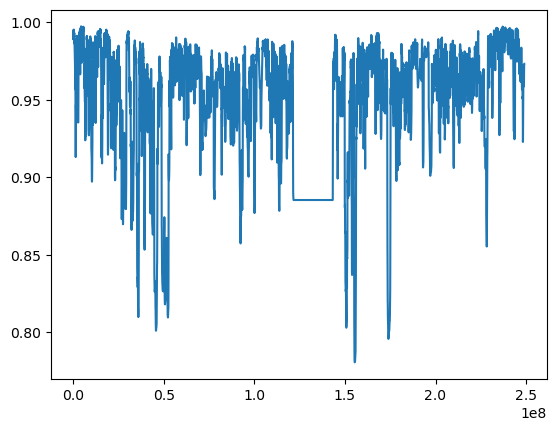

In [16]:
plt.plot(*a.BpScores.pairs('chr1', a.w[3], t=1e-3))

## Load Data

In [ ]:
def read_sim_fits(dir, params):
    mles = get_files(dir, '_mle.pkl')
    mb, mbp = mles['mb'], mles['mbp']
    for param in params:
        assert mb.metadata[param] == mbp.metadata[param]
    


In [20]:
DATADIR = "../data/slim_sims/test/"  # TODO - migrated from old repo, needs rename
result_files = os.listdir(DATADIR)

free_pi0s = list()
fixed_pi0s = list()

for file in result_files:
    filename = os.path.join(DATADIR, file)
    if not filename.endswith("fixedpi0ll.pkl"):
        continue
    with open(filename, 'rb') as f:
        res = pickle.load(f)
    ll, pi0, pi0_ll, pi0_grid, ws, ts, binned_B, binned_pi, gwpi, pi0_mle, w_mle, t_mle, wi_mle, ti_mle, md = res
    fixed_pi0s.append(dict(N=int(md['N']), t=float(md['s'])*float(md['h']), mu=float(md['mu']), pi0=pi0, pi0_mle=pi0_mle, t_mle=t_mle[0], w_mle=w_mle[0]))
    
    
for file in result_files:
    filename = os.path.join(DATADIR, file)
    if not filename.endswith("freepi0ll.pkl"):
        continue
    with open(filename, 'rb') as f:
        res = pickle.load(f)
    ll, pi0, pi0_ll, pi0_grid, ws, ts, binned_B, binned_pi, gwpi, pi0_mle, w_mle, t_mle, wi_mle, ti_mle, md = res
    free_pi0s.append(dict(N=int(md['N']), t=float(md['s'])*float(md['h']), mu=float(md['mu']), pi0=pi0, pi0_mle=pi0_mle, t_mle=t_mle[0], w_mle=w_mle[0]))

ModuleNotFoundError: No module named 'models'

In [6]:
dfree = pd.DataFrame(free_pi0s)
dfixed = pd.DataFrame(fixed_pi0s)
dfree.head()

,N,t,mu,pi0,pi0_mle,t_mle,w_mle
0,1000,-0.00500,1.500000e-08,0.000588,0.000588,0.006237,9.102982e-09
1,1000,-0.00001,2.000000e-08,0.001141,0.001141,0.562341,1.676833e-09
2,1000,-0.05000,1.500000e-08,0.000411,0.000411,0.088105,2.329952e-08
3,1000,-0.10000,1.500000e-08,0.000595,0.000595,0.088105,1.599859e-08
4,1000,-0.00500,2.000000e-08,0.000407,0.000407,0.004786,5.179475e-09


In [7]:
dfree['w_re'] = rel_error(dfree['mu'], dfree['w_mle'])

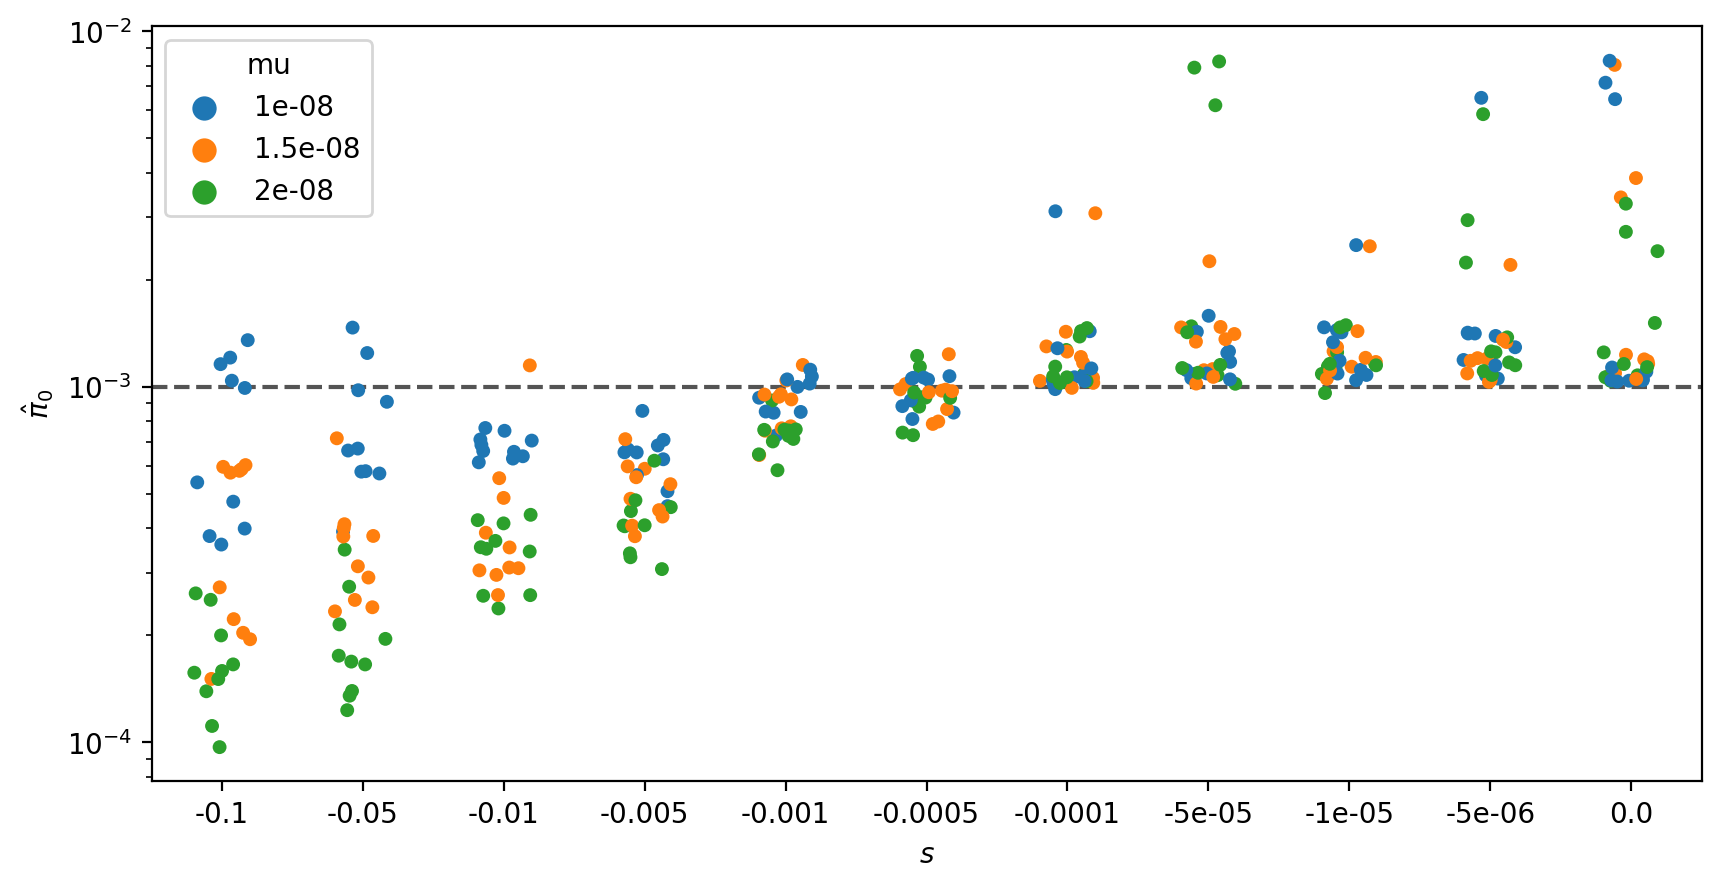

In [8]:
fig, ax = plt.subplots()

sns.stripplot(x="t", y="pi0_mle", data=dfree, hue="mu", jitter=0.2, ax = ax)

ax.axhline(4 * 2.5e-7*1000, c='0.33', linestyle='dashed')
ax.set_yscale('log')
ax.set_ylabel('$\\hat{\\pi}_0$')
ax.set_xlabel('$s$')
#fig.savefig('/home/vsb/pi0.pdf')

## Mutation rate estimation

### Fixed π0

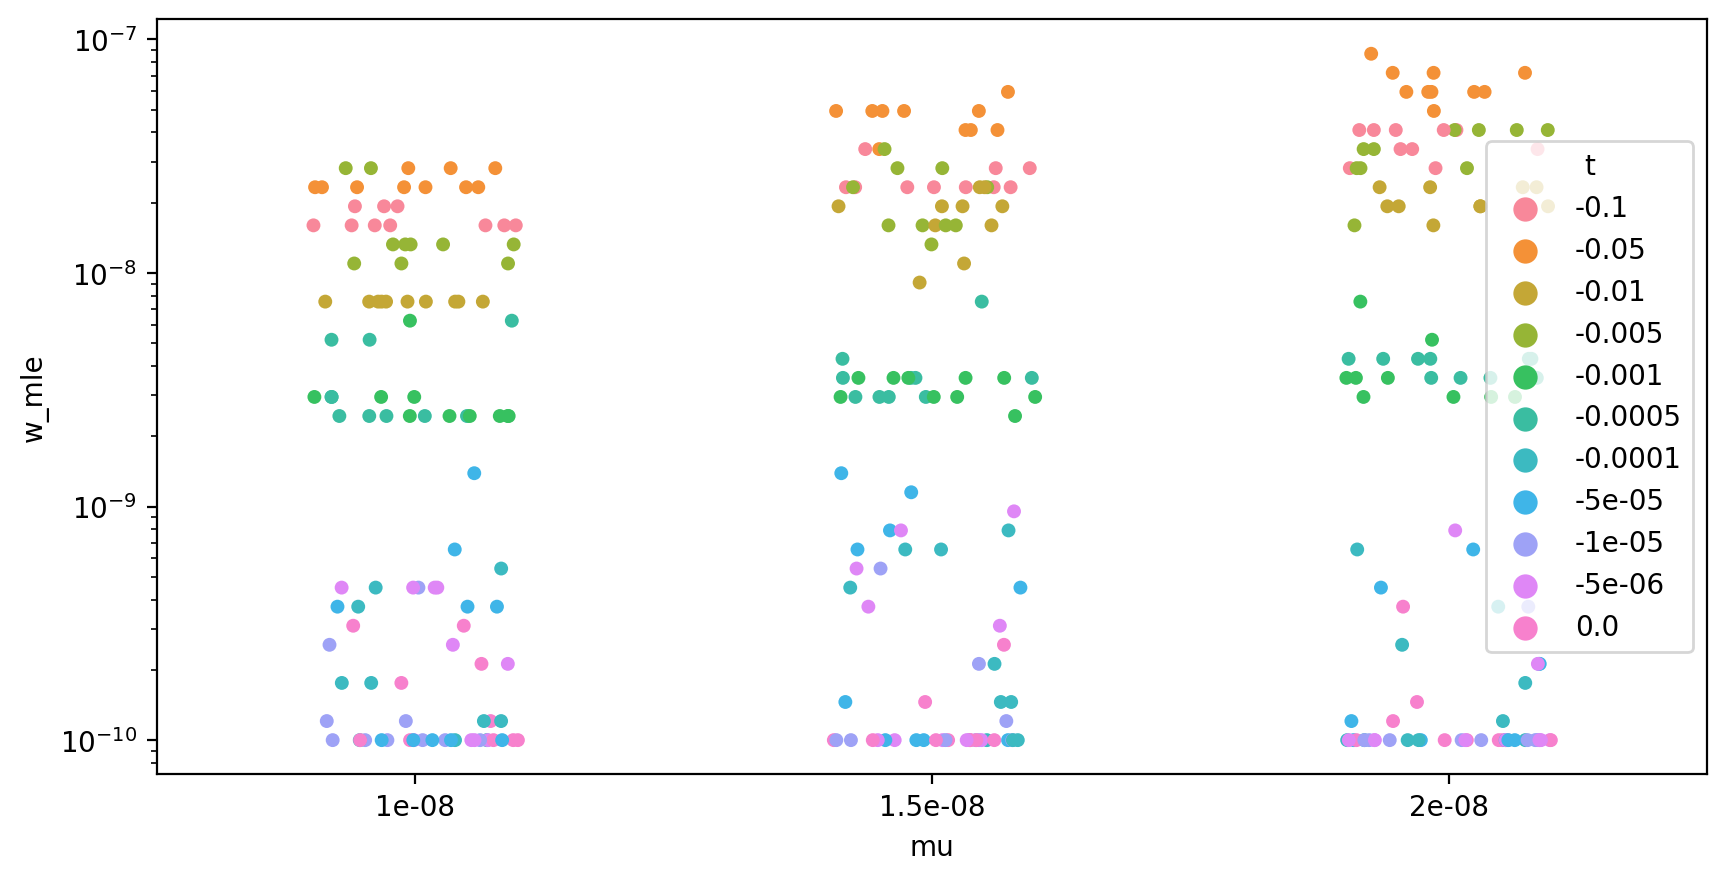

In [31]:
fig, ax = plt.subplots()

sns.stripplot(x="mu", y="w_mle", data=dfixed, hue="t", jitter=0.2, ax = ax)

#ax.axhline(4 * 2.5e-7*1000, c='r')
ax.set_yscale('log')

### Free π0

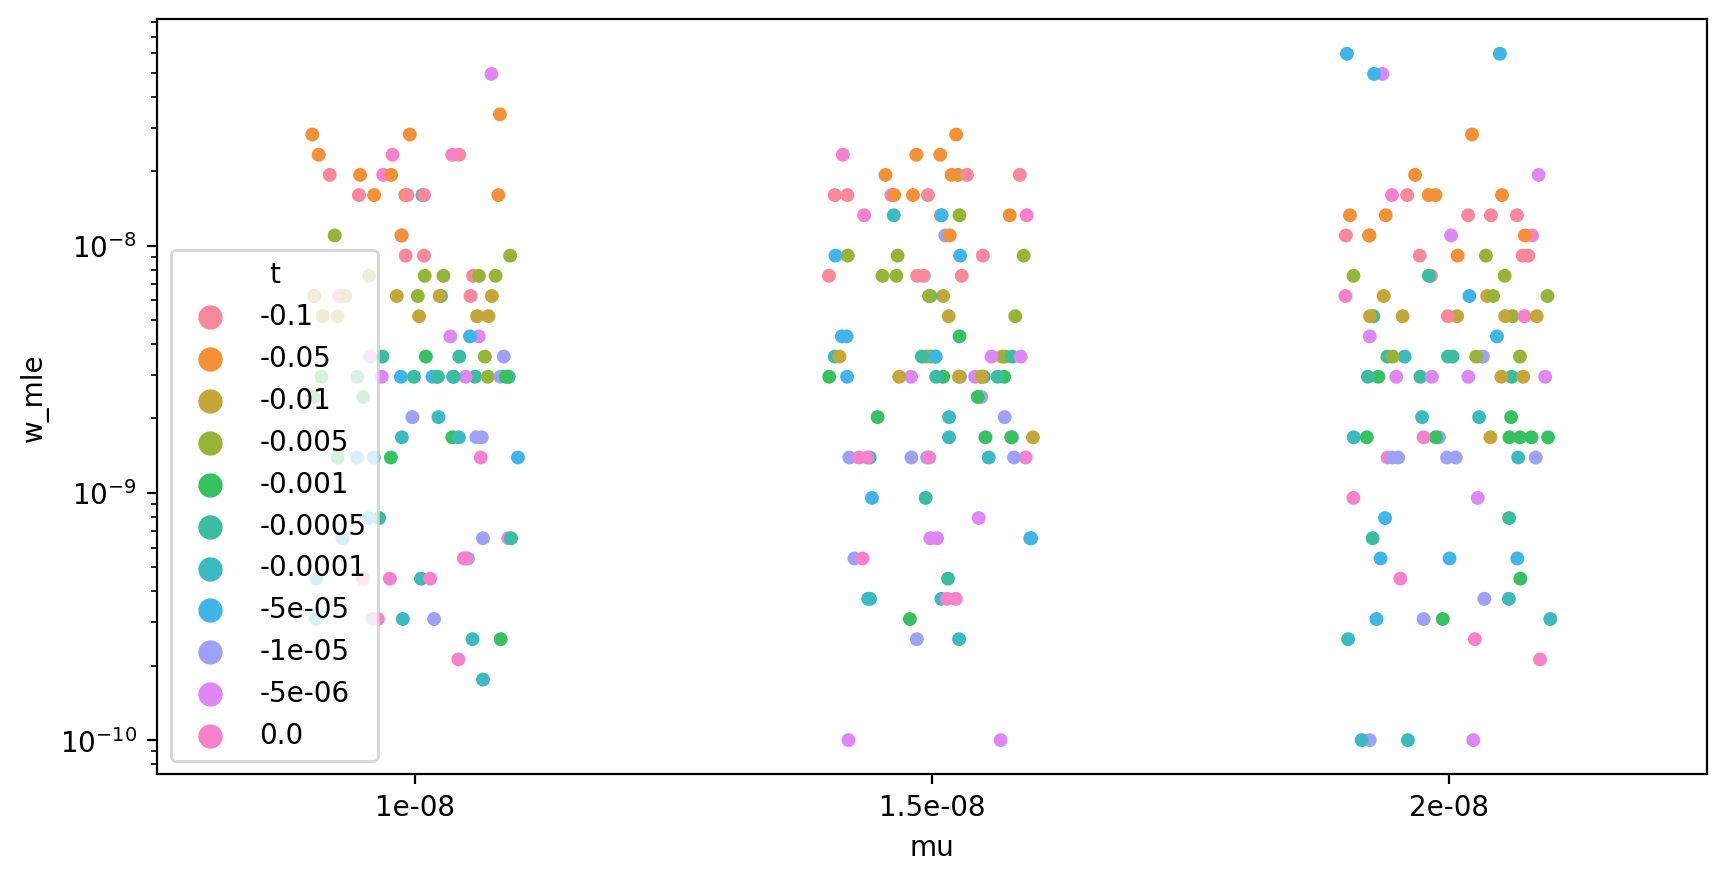

In [32]:
fig, ax = plt.subplots()

sns.stripplot(x="mu", y="w_mle", data=dfree, hue="t", jitter=0.2, ax = ax)

#ax.axhline(4 * 2.5e-7*1000, c='r')
ax.set_yscale('log')

## Selection coefficient estimation

### Free π0

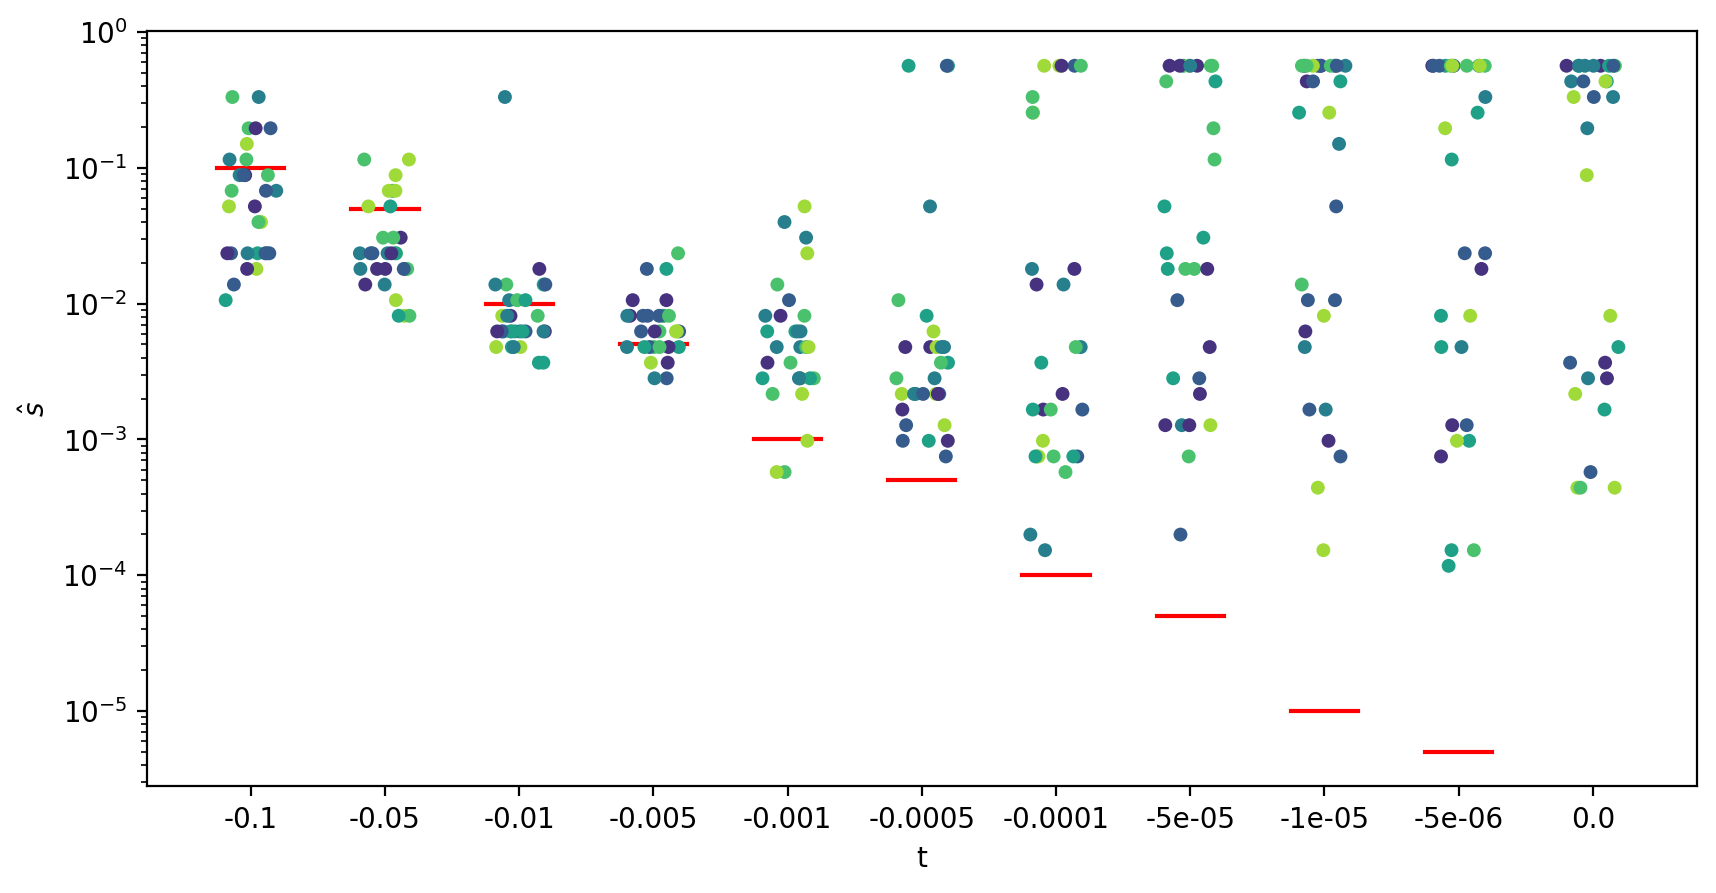

In [97]:
fig, ax = plt.subplots()
cpal = sns.color_palette('viridis')
dfree['pi0_mle_log10'] = np.log10(dfree['pi0_mle'])
sns.stripplot(x="t", y="t_mle", data=dfree, hue="pi0_mle_log10", jitter=0.2, ax=ax, palette=cpal)

median_width = 0.5
for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    val = -float(text.get_text())
    ax.plot([tick-median_width/2, tick+median_width/2], [val, val], c='r')
#ax.axhline(4 * 2.5e-7*1000, c='r')
ax.get_legend().remove()
ax.set_yscale('log')
ax.set_ylabel('$\hat{s}$')
#ax.legend()
#fig.colorbar(cmap)
fig.savefig('/home/vsb/s_hat.pdf')


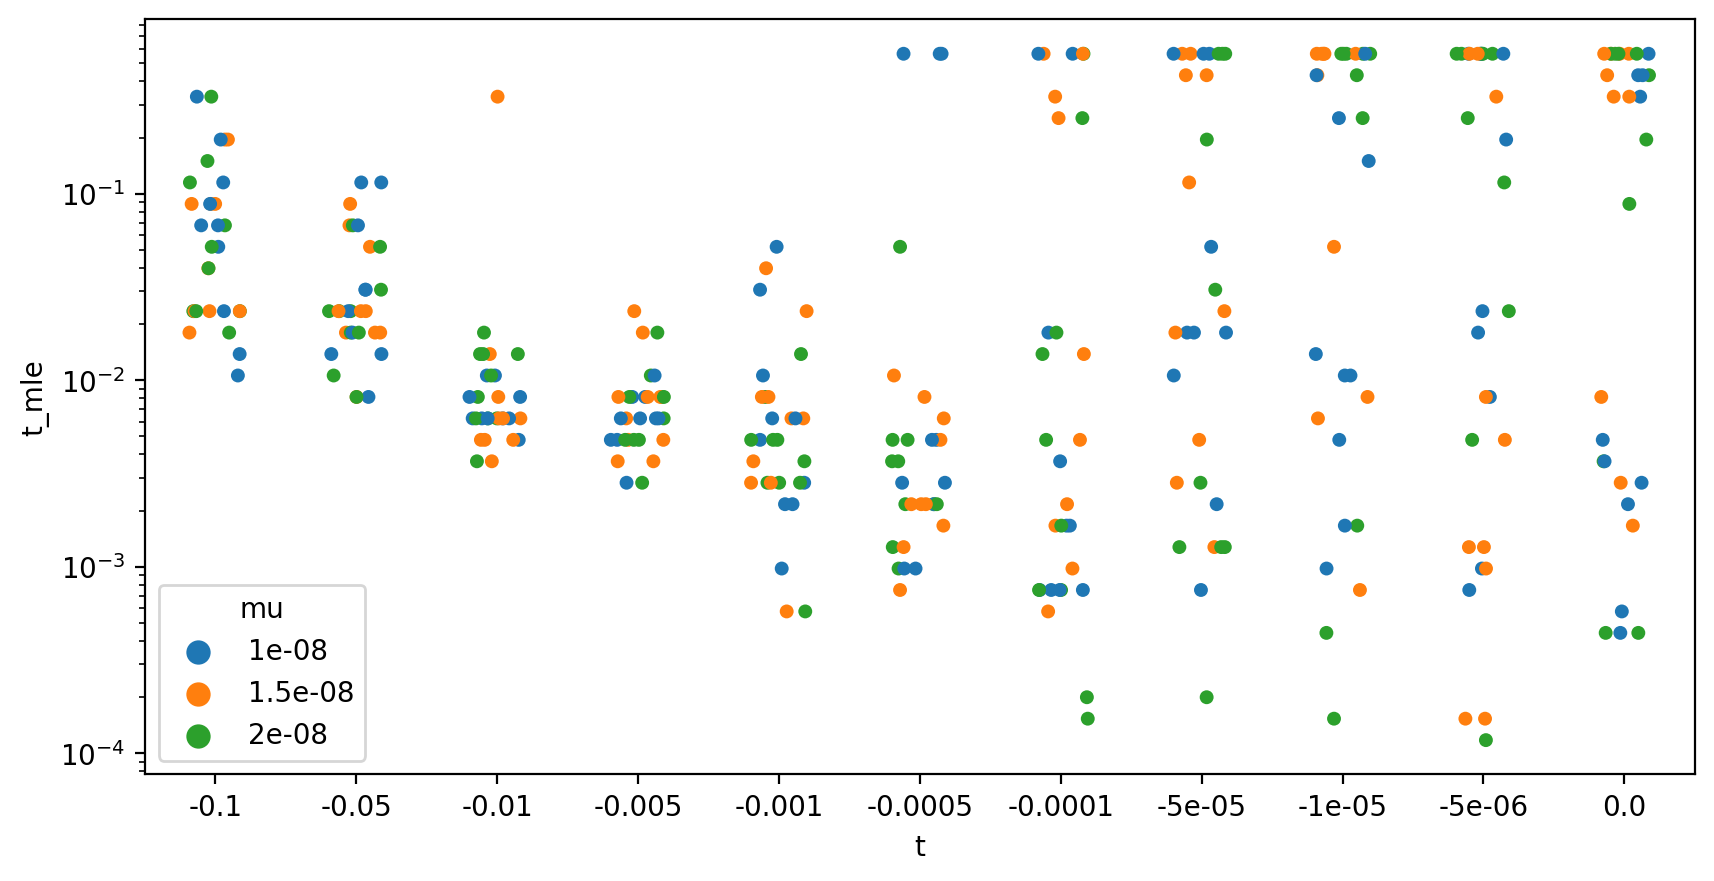

In [54]:
fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(as_cmap=True)

sns.stripplot(x="t", y="t_mle", data=dfree, hue="mu", cmap=cmap, jitter=0.2, ax = ax)

#ax.axhline(4 * 2.5e-7*1000, c='r')
#ax.get_legend().remove()
ax.set_yscale('log')
#fig.colorbar(cmap)


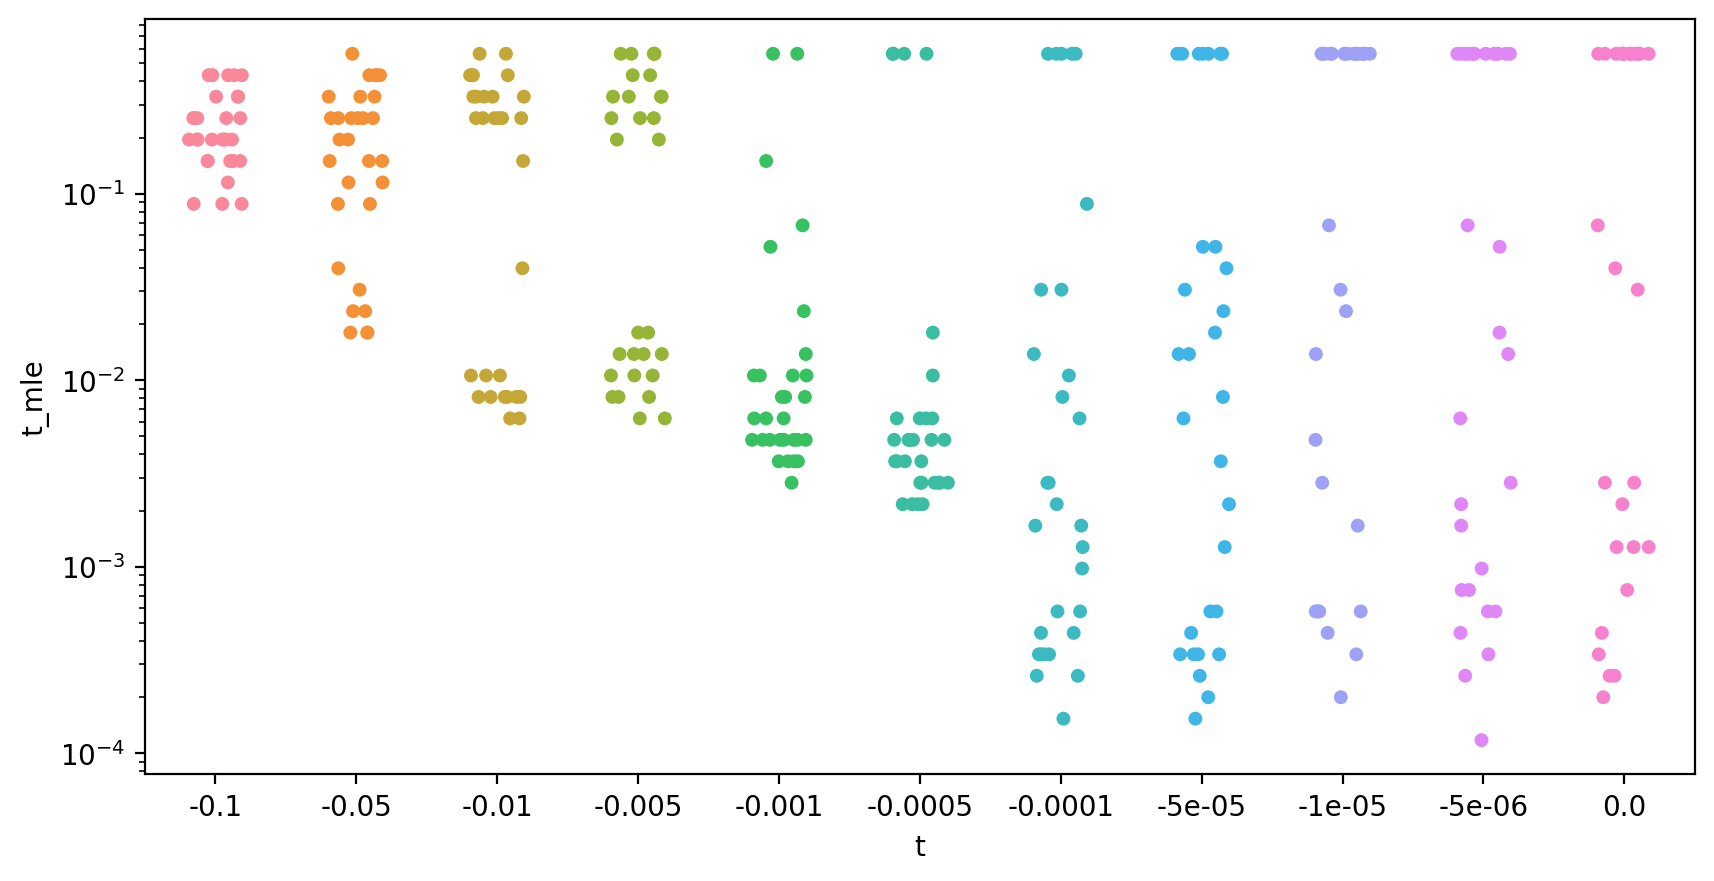

In [34]:
fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(as_cmap=True)

sns.stripplot(x="t", y="t_mle", data=dfixed, cmap=cmap, jitter=0.2, ax = ax)

#ax.axhline(4 * 2.5e-7*1000, c='r')
ax.set_yscale('log')
#fig.colorbar(cmap)


In [137]:
130000000 * 2.5e-7 * 1000 * 4

130000.0

In [14]:
ll, pi0, pi0_ll, pi0_grid, ws, ts, binned_B, binned_pi, gwpi, pi0_mle, w_mle, t_mle, wi_mle, ti_mle, md = res

In [18]:
pi0, pi0_mle

(0.0011481496987360924, 0.0011481496987360924)

In [19]:
md

{'N': '1000',
 'annot_file': '../data/annotation/conserved_chr10.bed',
 'h': '0.5',
 'mu': '1e-08',
 'recmap_file': '../data/annotation/rec_100kb_chr10.bed',
 'region_length': '130000000',
 's': '-1e-05'}